In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv("airbnb_clean.csv")
clean_data = pd.DataFrame(data)
data.head()

,id,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,street,neighbourhood,city,market,smart_location,...,reviews_per_month,review_scores_value,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,instant_bookable,cancellation_policy,price.1
0,1,f,Culver City,1.0,1.0,"Culver City, CA, United States",Culver City,Culver City,Los Angeles,"Culver City, CA",...,0.0,8.0,30.0,730.0,165,2,0,False,strict_14_with_grace_period,122
1,2,f,Burbank,1.0,1.0,"Burbank, CA, United States",Burbank,Burbank,Los Angeles,"Burbank, CA",...,0.2,9.0,2.0,14.0,0,6,1,True,flexible,168
2,3,t,Hollywood,2.0,2.0,"Los Angeles, CA, United States",Hollywood,Los Angeles,Los Angeles,"Los Angeles, CA",...,0.3,10.0,28.0,366.0,276,21,8,True,strict_14_with_grace_period,79
3,4,t,Santa Monica,2.0,2.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Los Angeles,"Santa Monica, CA",...,0.2,9.0,1.0,180.0,346,19,2,False,strict_14_with_grace_period,140
4,5,f,Bellflower,1.0,1.0,"Bellflower, CA, United States",Bellflower,Bellflower,Los Angeles,"Bellflower, CA",...,1.9,9.4,2.0,730.0,0,0,0,False,strict_14_with_grace_period,80


In [4]:
#Checking for duplicacy of columns
print(sum((clean_data['minimum_nights'] == clean_data['minimum_nights_avg_ntm']) == False))
print(sum((clean_data['maximum_nights'] == clean_data['maximum_nights_avg_ntm']) == False))
print(sum((clean_data['price'] == clean_data['price.1']) == False))
print(sum((clean_data['beds'] == clean_data['beds.1']) == False))



4363
134
0
71


In [5]:
clean_data.columns

Index(['id', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'street', 'neighbourhood', 'city',
       'market', 'smart_location', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'beds.1', 'last_review', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'reviews_per_month', 'review_scores_value', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'instant_bookable', 'cancellation_policy',
       'price.1'],
      dtype='object')

In [6]:
#Dropping columns with values very similar to other columns
clean_data.drop(['host_total_listings_count', 'price.1', 'minimum_nights_avg_ntm',\
                'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'beds.1'], axis = 1, inplace=True)

#Dropping data with too many categories that will not be useful for our analysis.
clean_data.drop(['street', 'neighbourhood', 'host_neighbourhood', 'city', 'market', 'smart_location', 'is_location_exact'], axis = 1, inplace=True)

print(clean_data.columns)
print(len(clean_data.columns))

Index(['id', 'host_is_superhost', 'host_listings_count', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'last_review', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'reviews_per_month', 'review_scores_value',
       'availability_365', 'number_of_reviews', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')
30


In [7]:
#Check all categorical columns for null values and delete the rows
print(clean_data['host_is_superhost'].isnull().sum())
print(clean_data['property_type'].isnull().sum())
print(clean_data['room_type'].isnull().sum())
print(clean_data['bed_type'].isnull().sum())
print(clean_data['instant_bookable'].isnull().sum())
print(clean_data['cancellation_policy'].isnull().sum())

16
0
0
0
0
0


In [8]:
#Drop null values in host_is_superhost column
clean_data['host_is_superhost'].dropna(how='any',axis=0,inplace=True)
print(clean_data['host_is_superhost'].isnull().sum())

0


In [9]:
#Check categories under property type
clean_data['property_type'].value_counts()

Apartment                 16654
House                     15436
Condominium                2645
Guesthouse                 2349
Guest suite                1543
Townhouse                  1364
Bungalow                   1201
Villa                      1075
Loft                        945
Serviced apartment          279
Hostel                      257
Cottage                     197
Camper/RV                   169
Bed and breakfast           165
Boutique hotel              139
Other                       139
Tiny house                   95
Cabin                        67
Hotel                        60
Aparthotel                   54
Boat                         33
Farm stay                    27
Tent                         23
Castle                       17
Dome house                   16
Chalet                       15
Earth house                  14
Campsite                     12
Treehouse                    12
Barn                          9
Tipi                          8
Yurt    

In [10]:
#Too many categories under property type. Classify some as a 'House' or an 'Apartment'.
clean_data.property_type.replace({
    'Townhouse': 'House',
    'Condominium': 'Apartment',
    'Loft': 'Apartment',
    'Serviced apartment':'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House',
    'Guesthouse': 'House',
    'Guest suite':'House',
    'Dome house': 'House',
    'Hut':'House'
    }, inplace=True)

#Replacing all other categories as 'Other'
clean_data.loc[~clean_data.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

#New distribution between categories
clean_data['property_type'].value_counts()

House        23308
Apartment    20523
Other         1222
Name: property_type, dtype: int64

In [11]:
#Check categories under cancellation policy
clean_data['cancellation_policy'].value_counts()

strict_14_with_grace_period    19729
flexible                       13168
moderate                       12146
super_strict_30                   10
Name: cancellation_policy, dtype: int64

In [12]:
#super_strict_30 is an outlier, remove these rows
index_strict_30 = clean_data[(clean_data['cancellation_policy'] == 'super_strict_30')].index
clean_data.drop(index_strict_30 , inplace=True)
clean_data['cancellation_policy'].value_counts()

strict_14_with_grace_period    19729
flexible                       13168
moderate                       12146
Name: cancellation_policy, dtype: int64

In [13]:
data['room_type'].value_counts()

Entire home/apt    28468
Private room       14410
Shared room         1769
Hotel room           406
Name: room_type, dtype: int64

In [14]:
#Hotel room adds no value and has very little data, remove these rows
index_hotel_room = clean_data[(clean_data['room_type'] == 'Hotel room')].index
clean_data.drop(index_hotel_room , inplace=True)
clean_data['room_type'].value_counts()

Entire home/apt    28459
Private room       14409
Shared room         1769
Name: room_type, dtype: int64

In [15]:
#Heavy on one class, should we remove?
data['bed_type'].value_counts()

Real Bed         44572
Futon              189
Pull-out Sofa      115
Airbed             104
Couch               73
Name: bed_type, dtype: int64

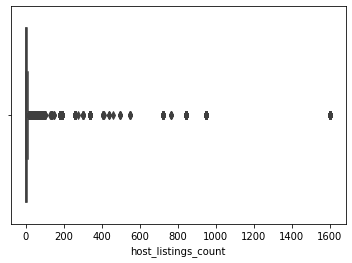

In [16]:
sns.boxplot(x=clean_data['host_listings_count'])

In [17]:
#Check how many rows has this outlying value of 1603
seriesObj = clean_data.apply(lambda x: True if 1603 in list(x) else False, axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

173


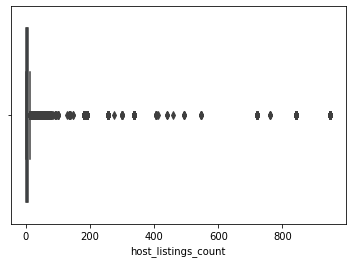

In [18]:
#Remove these rows with 1603
index_listing_outliers = clean_data[(clean_data['host_listings_count'] == 1603)].index
clean_data.drop(index_listing_outliers , inplace=True)
sns.boxplot(x=clean_data['host_listings_count'])

In [19]:
export_csv = clean_data.to_csv('aribnb_clean_jahnavi.csv',index = None, header = True)

In [20]:
numeric_data = pd.DataFrame()
numeric_data = clean_data[['id', 'host_listings_count','accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',\
                    'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', \
                    'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin',\
                    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month',\
                    'availability_365', 'price']]



numeric_data.head()

,id,host_listings_count,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,maximum_nights,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,availability_365,price
0,1,1.0,6,2.0,2.0,3,500.0,240,3,25,...,730,80.0,10.0,6.0,8.0,10.0,8.0,0.0,165,122
1,2,1.0,6,1.0,3.0,3,0.0,100,6,0,...,14,93.0,10.0,10.0,10.0,10.0,9.0,0.2,0,168
2,3,2.0,1,1.5,1.0,1,480.0,87,1,0,...,366,98.0,10.0,10.0,10.0,10.0,10.0,0.3,276,79
3,4,2.0,1,1.0,1.0,1,338.0,100,1,0,...,180,96.0,9.0,10.0,10.0,10.0,9.0,0.2,346,140
4,5,1.0,2,1.0,1.0,1,100.0,75,1,25,...,730,94.3,9.4,9.8,9.7,9.7,9.4,1.9,0,80


In [21]:
correlations_numeric = numeric_data.corr()

In [22]:
print(numeric_data[numeric_data.columns[1:]].corr()['price'][:].sort_values())

reviews_per_month             -0.040387
review_scores_value           -0.016975
review_scores_communication   -0.008702
review_scores_checkin          0.000514
maximum_nights                 0.007057
review_scores_rating           0.007932
minimum_nights                 0.009897
review_scores_cleanliness      0.010610
review_scores_location         0.019488
host_listings_count            0.042013
extra_people                   0.082354
availability_365               0.102457
guests_included                0.243109
beds                           0.292671
accommodates                   0.387066
cleaning_fee                   0.394526
bedrooms                       0.443785
security_deposit               0.526929
bathrooms                      0.528871
price                          1.000000
Name: price, dtype: float64


In [23]:
#https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable

#for converting categorical variables into numeric


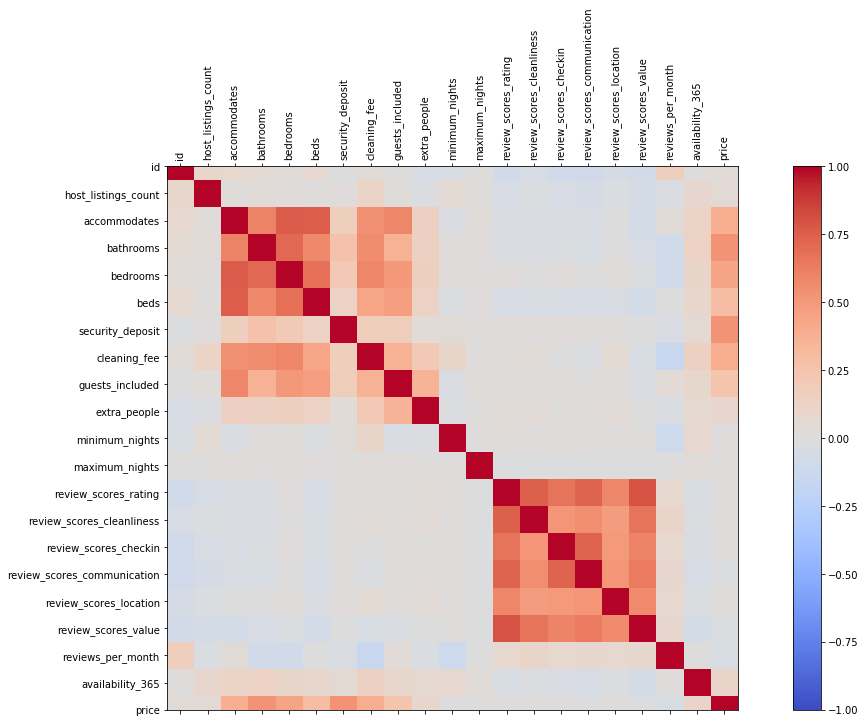

In [24]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_numeric, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(numeric_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_data.columns)
ax.set_yticklabels(numeric_data.columns)
plt.show()

In [25]:
features = numeric_data[numeric_data.columns.difference(['price'])]

y, X = patsy.dmatrices('price ~ features', numeric_data, return_type='dataframe')
features.insert(0, 'Intercept', 1)

vif = pd.DataFrame()
vif["features"] = features.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.round(1)
vif

,features,VIF Factor
0,Intercept,333.6
1,accommodates,3.6
2,availability_365,1.0
3,bathrooms,2.3
4,bedrooms,3.5
5,beds,2.5
6,cleaning_fee,1.8
7,extra_people,1.2
8,guests_included,1.8
9,host_listings_count,1.0


In [48]:
categorical_data = clean_data[['id', 'host_is_superhost', 'property_type', 'room_type', 'bed_type', 'instant_bookable',\
                               'cancellation_policy','price']]
categorical_data.head()

,id,host_is_superhost,property_type,room_type,bed_type,instant_bookable,cancellation_policy,price
0,1,f,Apartment,Entire home/apt,Real Bed,False,strict_14_with_grace_period,122
1,2,f,House,Entire home/apt,Real Bed,True,flexible,168
2,3,t,Apartment,Private room,Real Bed,True,strict_14_with_grace_period,79
3,4,t,Apartment,Private room,Pull-out Sofa,False,strict_14_with_grace_period,140
4,5,f,Apartment,Entire home/apt,Real Bed,False,strict_14_with_grace_period,80


In [49]:
cat_data_dummies = pd.DataFrame(categorical_data)

#Convert columns to categorical
def convert_to_categorical(col_name):
    data[col_name] = data[col_name].astype('category')

for i in range(1, len(cat_data_dummies.columns)-1):
    convert_to_categorical(cat_data_dummies.columns[i])

#One hot encoding to create dummy variables
new_cols = pd.get_dummies(cat_data_dummies['host_is_superhost'],prefix='host_is_superhost')
cat_data_dummies = pd.concat([cat_data_dummies,new_cols.round().astype(int)], axis=1)

new_cols = pd.get_dummies(cat_data_dummies['property_type'],prefix='property_type')
cat_data_dummies = pd.concat([cat_data_dummies,new_cols.round().astype(int)], axis=1)

new_cols = pd.get_dummies(cat_data_dummies['room_type'],prefix='room_type')
cat_data_dummies = pd.concat([cat_data_dummies,new_cols.round().astype(int)], axis=1)

new_cols = pd.get_dummies(cat_data_dummies['bed_type'],prefix='bed_type')
cat_data_dummies = pd.concat([cat_data_dummies,new_cols.round().astype(int)], axis=1)

new_cols = pd.get_dummies(cat_data_dummies['instant_bookable'],prefix='instant_bookable')
cat_data_dummies = pd.concat([cat_data_dummies,new_cols.round().astype(int)], axis=1)

new_cols = pd.get_dummies(cat_data_dummies['cancellation_policy'],prefix='cancellation_policy')
cat_data_dummies = pd.concat([cat_data_dummies,new_cols.round().astype(int)], axis=1)

cat_data_dummies.head()

,id,host_is_superhost,property_type,room_type,bed_type,instant_bookable,cancellation_policy,price,host_is_superhost_f,host_is_superhost_t,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_False,instant_bookable_True,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period
0,1,f,Apartment,Entire home/apt,Real Bed,False,strict_14_with_grace_period,122,1,0,...,0,0,0,0,1,1,0,0,0,1
1,2,f,House,Entire home/apt,Real Bed,True,flexible,168,1,0,...,0,0,0,0,1,0,1,1,0,0
2,3,t,Apartment,Private room,Real Bed,True,strict_14_with_grace_period,79,0,1,...,0,0,0,0,1,0,1,0,0,1
3,4,t,Apartment,Private room,Pull-out Sofa,False,strict_14_with_grace_period,140,0,1,...,0,0,0,1,0,1,0,0,0,1
4,5,f,Apartment,Entire home/apt,Real Bed,False,strict_14_with_grace_period,80,1,0,...,0,0,0,0,1,1,0,0,0,1


In [50]:
#Drop original categorical columns
cat_data_dummies = cat_data_dummies.drop(['host_is_superhost', 'property_type', 'room_type', 'bed_type', 'instant_bookable',\
                      'cancellation_policy'], axis=1)
cat_data_dummies.head()

,id,price,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_False,instant_bookable_True,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period
0,1,122,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
1,2,168,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0
2,3,79,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
3,4,140,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
4,5,80,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1


In [51]:
#Correlation between price and other variables. Absolute values only so they could be sorted.
print(cat_data_dummies[cat_data_dummies.columns[1:]].corr()['price'][:].abs().sort_values())

bed_type_Couch                                     0.007440
bed_type_Pull-out Sofa                             0.009981
bed_type_Airbed                                    0.010057
bed_type_Futon                                     0.011641
property_type_Other                                0.014532
cancellation_policy_moderate                       0.018193
bed_type_Real Bed                                  0.019830
host_is_superhost_f                                0.031709
host_is_superhost_t                                0.031779
cancellation_policy_flexible                       0.033489
cancellation_policy_strict_14_with_grace_period    0.047028
instant_bookable_False                             0.051524
instant_bookable_True                              0.051524
room_type_Shared room                              0.054893
property_type_Apartment                            0.096241
property_type_House                                0.100040
room_type_Private room                  

In [52]:
correlations_cat = cat_data_dummies.corr()

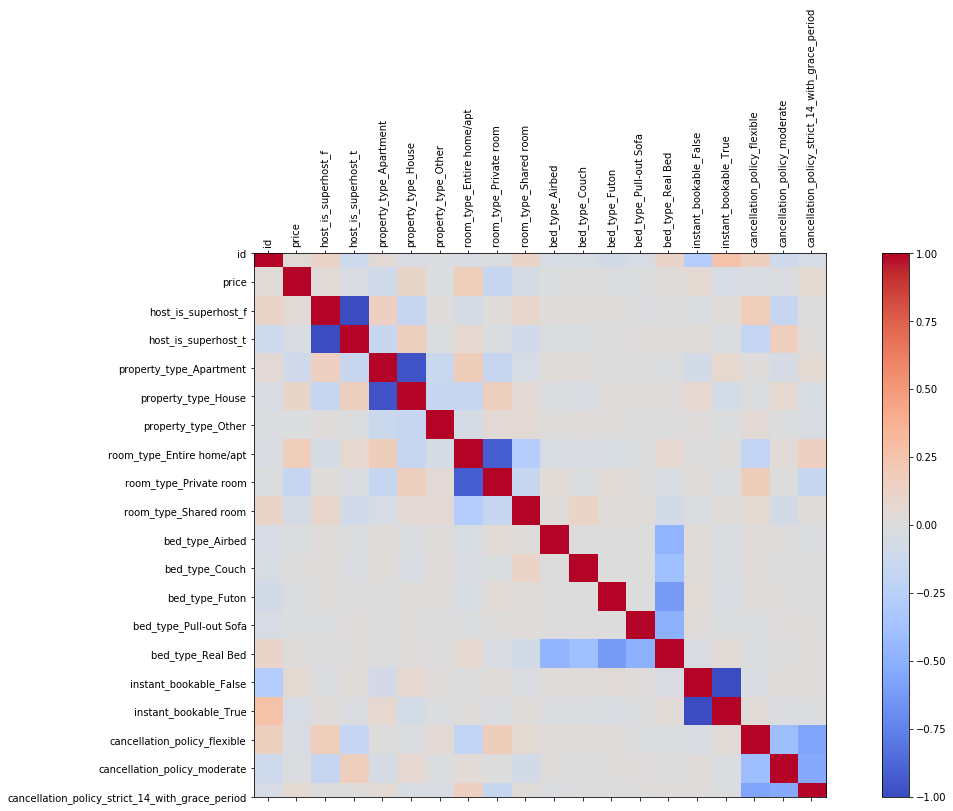

In [53]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_cat, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cat_data_dummies.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cat_data_dummies.columns)
ax.set_yticklabels(cat_data_dummies.columns)
plt.show()

In [56]:
combined_dataset = pd.DataFrame()
combined_dataset = pd.merge(numeric_data, cat_data_dummies, on='id')
combined_dataset.head()

,id,host_listings_count,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_False,instant_bookable_True,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period
0,1,1.0,6,2.0,2.0,3,500.0,240,3,25,...,0,0,0,0,1,1,0,0,0,1
1,2,1.0,6,1.0,3.0,3,0.0,100,6,0,...,0,0,0,0,1,0,1,1,0,0
2,3,2.0,1,1.5,1.0,1,480.0,87,1,0,...,0,0,0,0,1,0,1,0,0,1
3,4,2.0,1,1.0,1.0,1,338.0,100,1,0,...,0,0,0,1,0,1,0,0,0,1
4,5,1.0,2,1.0,1.0,1,100.0,75,1,25,...,0,0,0,0,1,1,0,0,0,1


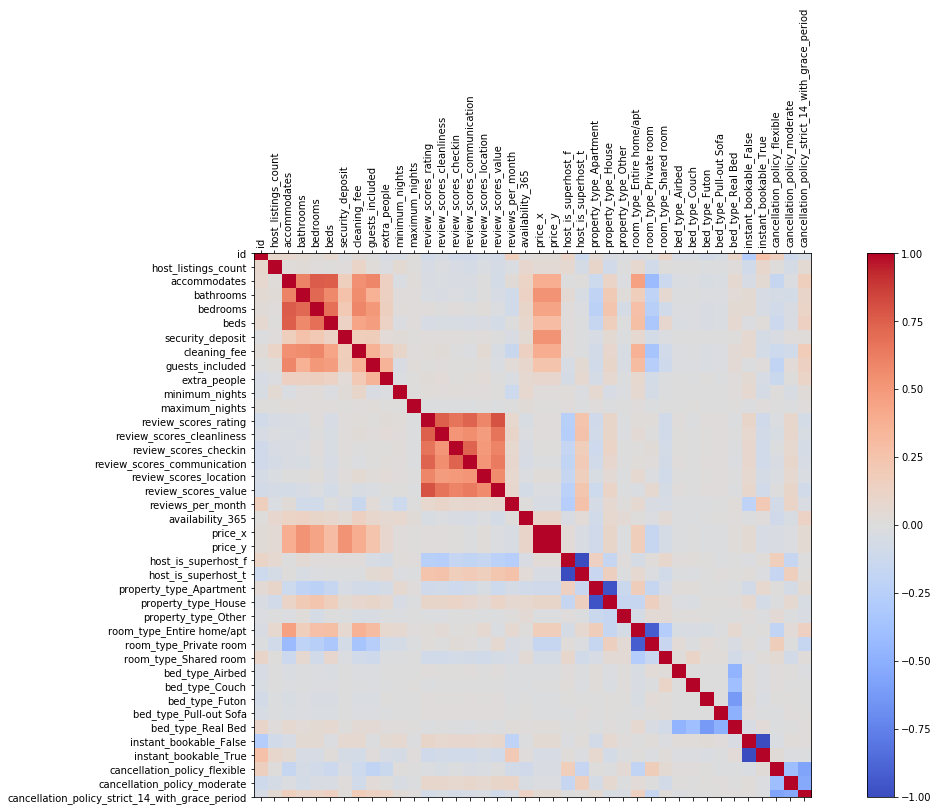

In [57]:
correlations_all = combined_dataset.corr()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_all, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(combined_dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(combined_dataset.columns)
ax.set_yticklabels(combined_dataset.columns)
plt.show()

In [36]:
clean_data['price'].median()

110.0

Drop columns that are not highly correlated to the price
Numeric Columns being dropped:
reviews_per_month, review_scores_value, review_scores_communication, review_scores_checkin, maximum_nights
review_scores_rating, minimum_nights, review_scores_cleanliness, review_scores_location, host_listings_count

Categorical Columns being dropped:
bed_type, cancellation_policy, instant_bookable, host_is_superhost


In [67]:
#Dropping columns
final_data = pd.DataFrame(clean_data)
final_data.drop(['reviews_per_month', 'review_scores_value', 'review_scores_communication', 'review_scores_checkin',\
                'maximum_nights', 'review_scores_rating', 'minimum_nights', 'review_scores_cleanliness',\
                'review_scores_location', 'host_listings_count', 'bed_type', 'cancellation_policy', 'instant_bookable',\
                 'host_is_superhost'], axis=1, inplace=True)
final_data.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
0,1,Apartment,Entire home/apt,6,2.0,2.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",122,500.0,240,3,25,42505.0,165,2
1,2,House,Entire home/apt,6,1.0,3.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",168,0.0,100,6,0,43394.0,0,6
2,3,Apartment,Private room,1,1.5,1.0,1,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79,480.0,87,1,0,43680.0,276,21
3,4,Apartment,Private room,1,1.0,1.0,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",140,338.0,100,1,0,43680.0,346,19
4,5,Apartment,Entire home/apt,2,1.0,1.0,1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,100.0,75,1,25,43554.5,0,0


In [71]:
export_csv = final_data.to_csv('aribnb_final_clean.csv',index = None, header = True)